Preprocessing

In [40]:
# Importing Libraries
import pandas as pd
import numpy as np
import pickle

In [41]:
df_train=pd.read_csv('train.csv',index_col=False)
labels=df_train[['784']]

In [42]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,232,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,132,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


Training the data

In [43]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
K.image_data_format()

'channels_last'

In [44]:
labels=np.array(labels)

In [45]:
from keras.utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [46]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [47]:
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,232,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,132,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_train.shape

(14326, 784)

In [49]:
temp=df_train.to_numpy()

In [50]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [51]:
temp.shape[0]

14326

In [52]:
X_train.shape

(14326, 28, 28, 1)

In [53]:
l=[]
for i in range(7163):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [54]:
np.random.seed(7)

In [55]:
X_train.shape

(14326, 28, 28, 1)

 Building CNN Model

In [56]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [57]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
from keras.models import model_from_json

In [59]:
model.fit(X_train, cat, epochs=10, batch_size=200,shuffle=True,verbose=1)

Epoch 1/10
72/72 [==============================] - 4s 33ms/step - loss: 2.8628 - accuracy: 0.3510
Epoch 2/10
72/72 [==============================] - 2s 32ms/step - loss: 0.8077 - accuracy: 0.7559
Epoch 3/10
72/72 [==============================] - 2s 32ms/step - loss: 0.4186 - accuracy: 0.8724
Epoch 4/10
72/72 [==============================] - 2s 32ms/step - loss: 0.2642 - accuracy: 0.9186
Epoch 5/10
72/72 [==============================] - 2s 31ms/step - loss: 0.2051 - accuracy: 0.9368
Epoch 6/10
72/72 [==============================] - 2s 31ms/step - loss: 0.1560 - accuracy: 0.9522
Epoch 7/10
72/72 [==============================] - 2s 31ms/step - loss: 0.1259 - accuracy: 0.9614
Epoch 8/10
72/72 [==============================] - 2s 31ms/step - loss: 0.1118 - accuracy: 0.9651
Epoch 9/10
72/72 [==============================] - 2s 31ms/step - loss: 0.0890 - accuracy: 0.9731
Epoch 10/10
72/72 [==============================] - 2s 31ms/step - loss: 0.0744 - accuracy: 0.9769


In [60]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [61]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
# K.set_image_dim_ordering('th')
from keras.models import model_from_json

In [62]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final.h5")

Loading the image for testing

In [67]:
import cv2
import numpy as np
img = cv2.imread('C:\\Users\\Gatha\\test1.png',cv2.IMREAD_GRAYSCALE)
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

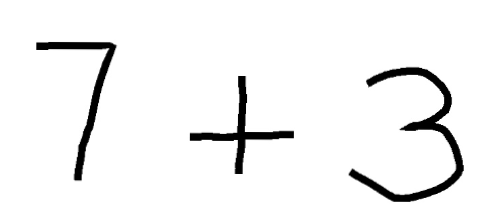

In [68]:
from IPython import display
display.Image("C:\\Users\\Gatha\\test1.png",width=250)

In [69]:
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28))


        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

3
[[36, 42, 80, 138], [190, 76, 104, 98], [349, 67, 115, 135]]
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
0
[[36, 42, 80, 138], [190, 76, 104, 98], [349, 67, 115, 135]]


Finally Doing the Arithmatic Operations and showing te result

In [70]:
import ast
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'
    
print('\nThe Output is:',eval(s))

1/1 [==============================] - 0s 24ms/step

The Output is: 10
